# Step 1:
# Import libraries, import data and identify the country/territory with the most earthquakes in the last 30 days

In [34]:
# Import necessary libraries
import pytest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load("en_core_web_sm")

# Adjust Pandas options to display all rows
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

In [8]:
# Define URL of file containing the necessary data
url = 'https://raw.githubusercontent.com/jhall1996/Earthquake-Take-Home/main/query.csv'
# Load data from URL into Pandas dataframe
df = pd.read_csv(url)

In [9]:
# Function to extract GPE (Geopolitical Entity) entities from data using Spacy NLP model
def extract_gpe_entities(text):

    doc = nlp(text)

    # Extract and store entities labeled as 'GPE'
    gpe_entities = [ent.text for ent in doc.ents if ent.label_ == 'GPE']

    # Return the GPE entities; or return Unknown
    return ', '.join(gpe_entities) if gpe_entities else 'Unknown'

In [10]:
# Apply the extract GPE function to the 'place' column, and store as new column titled 'country'
df['country'] = df['place'].apply(extract_gpe_entities)

In [11]:
# Remove blank spaces and display the first 10 results for verification of changes
df['country'] = df['country'].str.strip()
df[['place', 'country']].head(10)

,place,country
0,"Kermadec Islands, New Zealand",New Zealand
1,Fiji region,Fiji
2,"10 km WSW of Susitna, Alaska",Alaska
3,"2 km E of Isehara, Japan","Isehara, Japan"
4,"68 km NNE of White Mountain, Alaska",Alaska
5,Fiji region,Fiji
6,"57 km SSW of Nanwalek, Alaska","Nanwalek, Alaska"
7,central East Pacific Rise,Unknown
8,"9 km NE of Alpine Northeast, Wyoming",Wyoming
9,"Kermadec Islands, New Zealand",New Zealand


In [12]:
# Filter the dataframe to remove results containing Alaska, and unknown results
df_filtered = df[~df['country'].str.contains('Alaska', case=False, na=False) & (df['country'] != 'Unknown')]

In [13]:
# Count the number of instances of each country/territory
country_counts = df_filtered['country'].value_counts()

In [15]:
# Investigate initial results
print(country_counts.head(20))

country
Hawaii                                  155
Volcano, Hawaii                          42
Whites City, New Mexico                  29
Hermleigh, Texas                         27
Chile                                    26
Puerto Rico                              24
Japan                                    21
Levuka, Fiji                             20
Russia                                   18
South Sandwich                           17
Pāhala, Hawaii                           17
Fiji                                     16
Papua New Guinea                         16
New Zealand                              13
Lamont                                   12
San Antonio de los Cobres, Argentina     11
Canada                                   10
Hihifo, Tonga                            10
Tobelo, Indonesia                        10
Lospalos, Timor                           9
Name: count, dtype: int64


In [16]:
# Standardise the data.
# Ensure all values are strings, and keep only final part of the string by removing anything before a comma and storing in a new column.
df_filtered['country'] = df_filtered['country'].astype(str)
df_filtered['final_country'] = df_filtered['country'].apply(lambda x: x.split(',')[-1].strip())

<ipython-input-16-2761d5546ad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['country'] = df_filtered['country'].astype(str)
<ipython-input-16-2761d5546ad5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['final_country'] = df_filtered['country'].apply(lambda x: x.split(',')[-1].strip())


In [19]:
#Re-run the value counter using only the final country/territory, investigate results.
country_counts = df_filtered['final_country'].value_counts()
print(country_counts.head(10))

final_country
Hawaii         215
Japan           64
Puerto Rico     63
Indonesia       61
Texas           47
Chile           44
Philippines     42
Fiji            37
New Mexico      30
Russia          28
Name: count, dtype: int64


In [20]:
# Find country/territory with the most earthquakes
most_earthquakes_country = country_counts.idxmax()
most_earthquakes_count = country_counts.max()

print(f"The country/territory which had the most earthquakes in the last 30 days, with {most_earthquakes_count} number of earthquakes, is: {most_earthquakes_country}.")

The country/territory which had the most earthquakes in the last 30 days, with 215 number of earthquakes, is: Hawaii.


# Step 2:
# Find the top 3 locations with the highest magnitude earthquakes in the last 30 days, sorted by timestamp (descending).

In [23]:
# Sort 'df_filtered' by magnitude (descending) to find the top 3 earthquakes
df_sorted_by_magnitude = df_filtered.sort_values(by='mag', ascending=False)
top_3 = df_sorted_by_magnitude[['place', 'mag', 'magType', 'time']].head(3)

# Sort top 3 rows by timestamp in descending order
top_3_by_timestamp = top_3.sort_values(by='time', ascending=False)

# Print the top 3 locations with the highest magnitude earthquakes and their magnitude type, sorted by timestamp
print("Top 3 locations with the highest magnitude earthquakes in the last 30 days:")
for index, row in top_3_by_timestamp.iterrows():
    print(f"Location: {row['place']}, Magnitude: {row['mag']}, Magnitude Type: {row['magType']}, Timestamp: {row['time']}")


Top 3 locations with the highest magnitude earthquakes in the last 30 days:
Location: 2024 Hyuganada Sea, Japan Earthquake, Magnitude: 7.1, Magnitude Type: mww, Timestamp: 2024-08-08T07:42:55.345Z
Location: 45 km ESE of San Pedro de Atacama, Chile, Magnitude: 7.4, Magnitude Type: mww, Timestamp: 2024-07-19T01:50:47.675Z
Location: 105 km WSW of Sangay, Philippines, Magnitude: 7.1, Magnitude Type: mww, Timestamp: 2024-07-11T02:13:17.720Z


# Step 3: Exploratory Data Analysis

# Investigating the data to determine which criteria to use in the evaluation of countries which are the highest risk to insure. We will continue to work with the filtered dataframe.

In [25]:
# Get the counts of each unique value in the 'type' column
type_counts = df_filtered['type'].value_counts()
print(type_counts)

type
earthquake    1086
Name: count, dtype: int64


In [26]:
# View the first 10 rows of the dataframe
df_filtered.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country,final_country
0,2024-08-09T12:23:01.617Z,-30.3877,-177.5593,31.153,5.9,mww,113.0,41.0,1.165,1.21,us,us6000nj2k,2024-08-09T13:03:00.108Z,"Kermadec Islands, New Zealand",earthquake,8.77,3.370,0.051,37.0,reviewed,us,us,New Zealand,New Zealand
1,2024-08-09T11:10:45.960Z,-21.6595,-179.3918,593.463,5.6,mww,95.0,24.0,3.932,0.77,us,us6000nj27,2024-08-09T12:18:56.104Z,Fiji region,earthquake,9.91,6.220,0.103,9.0,reviewed,us,us,Fiji,Fiji
3,2024-08-09T10:57:38.837Z,35.3962,139.3412,24.876,5.0,mww,110.0,74.0,1.472,0.95,us,us6000nj24,2024-08-09T12:54:42.315Z,"2 km E of Isehara, Japan",earthquake,7.19,4.035,0.098,10.0,reviewed,us,us,"Isehara, Japan",Japan
5,2024-08-09T09:35:40.386Z,-21.9017,-179.1817,590.702,4.8,mb,96.0,75.0,3.774,0.80,us,us6000nj1t,2024-08-09T09:50:49.040Z,Fiji region,earthquake,9.07,6.136,0.059,88.0,reviewed,us,us,Fiji,Fiji
8,2024-08-09T08:21:19.928Z,43.2455,-110.9118,6.924,3.1,ml,63.0,56.0,0.243,0.66,us,us6000nj1k,2024-08-09T13:01:35.338Z,"9 km NE of Alpine Northeast, Wyoming",earthquake,3.18,6.561,0.042,74.0,reviewed,us,us,Wyoming,Wyoming
9,2024-08-09T07:36:57.353Z,-30.3767,-177.5671,22.726,5.0,mb,30.0,79.0,1.153,1.02,us,us6000nj1g,2024-08-09T07:55:12.040Z,"Kermadec Islands, New Zealand",earthquake,13.07,6.315,0.101,31.0,reviewed,us,us,New Zealand,New Zealand
10,2024-08-09T07:21:38.060Z,-3.1141,147.4855,10.000,4.8,mb,29.0,119.0,6.258,0.61,us,us6000nj1c,2024-08-09T07:40:19.040Z,"121 km SSE of Lorengau, Papua New Guinea",earthquake,10.92,1.903,0.107,27.0,reviewed,us,us,"Lorengau, Papua New Guinea",Papua New Guinea
11,2024-08-09T06:55:29.899Z,-30.4112,-177.6266,28.676,5.0,mb,30.0,121.0,1.173,1.29,us,us6000nj15,2024-08-09T07:13:42.040Z,"Kermadec Islands, New Zealand",earthquake,13.48,6.450,0.095,35.0,reviewed,us,us,New Zealand,New Zealand
12,2024-08-09T05:42:18.806Z,-30.3623,-177.6849,35.173,5.0,mb,50.0,100.0,1.115,1.33,us,us6000nj0y,2024-08-09T06:08:52.040Z,"Kermadec Islands, New Zealand",earthquake,11.73,7.325,0.078,52.0,reviewed,us,us,New Zealand,New Zealand
13,2024-08-09T04:23:35.025Z,31.6473,76.9775,10.000,3.6,mb,9.0,187.0,3.712,0.75,us,us6000nj0n,2024-08-09T05:11:48.791Z,"7 km WSW of Pāndoh, India",earthquake,9.75,2.002,0.353,2.0,reviewed,us,us,"Pāndoh, India",India


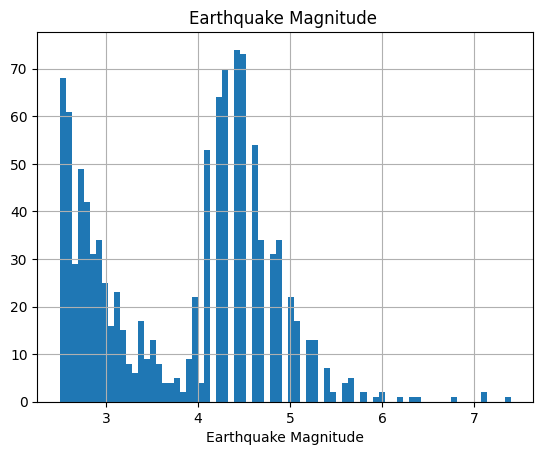

In [25]:
# Generate histogram to see the frequency of earthquakes within the various magnitude ranges.
df_filtered['mag'].hist(density=False, bins=75)
plt.xlabel("Earthquake Magnitude")
plt.title("Earthquake Magnitude Histogram ")
plt.show()

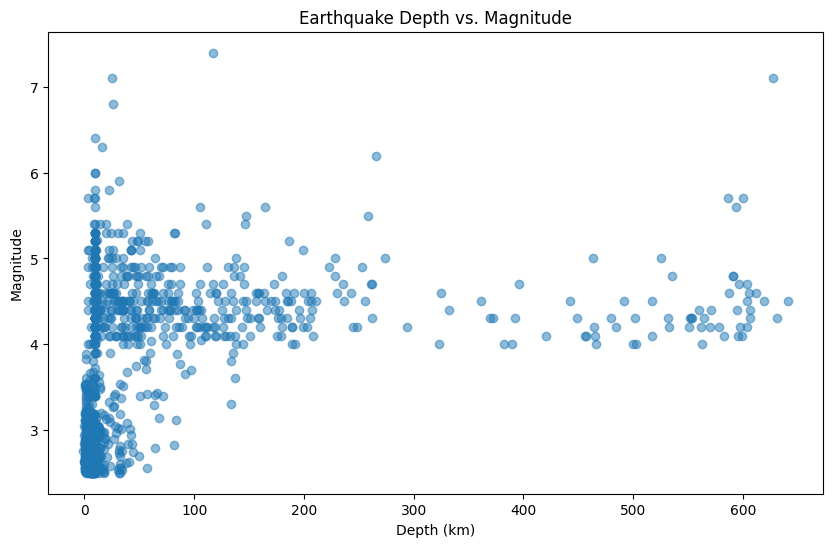

In [27]:
# Generate a scatter plot of earthquake depth against magnitude
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['depth'], df_filtered['mag'], alpha=0.5)
plt.title('Earthquake Depth vs. Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

In [52]:
# Assess top 10 countries with the highest number of earthquakes, and their corresponding average magnitude and depth
location_group = df_filtered.groupby('final_country').agg({
    'mag': ['count', 'mean'],
    'depth': 'mean'
}).reset_index()

location_group.columns = ['final_country', 'num_earthquakes', 'avg_magnitude', 'avg_depth']
top_locations = location_group.sort_values(by='num_earthquakes', ascending=False).head(10)
print("Top locations with the highest number of earthquakes and their average magnitude and depth:")
print(top_locations)


Top locations with the highest number of earthquakes and their average magnitude and depth:
   final_country  num_earthquakes  avg_magnitude   avg_depth
28        Hawaii              215       2.841116    4.700623
40         Japan               64       4.592187   99.968672
77   Puerto Rico               63       2.976508   24.043492
35     Indonesia               61       4.672131   83.542984
93         Texas               47       3.017021    6.014830
13         Chile               44       4.379545   98.886727
73   Philippines               42       4.780952   80.845786
21          Fiji               37       4.462162  555.772189
60    New Mexico               30       2.850000    5.981357
80        Russia               28       4.385714   81.891643


# Step 4

# 3 countries/territories that would be the highest risk to insure property within.

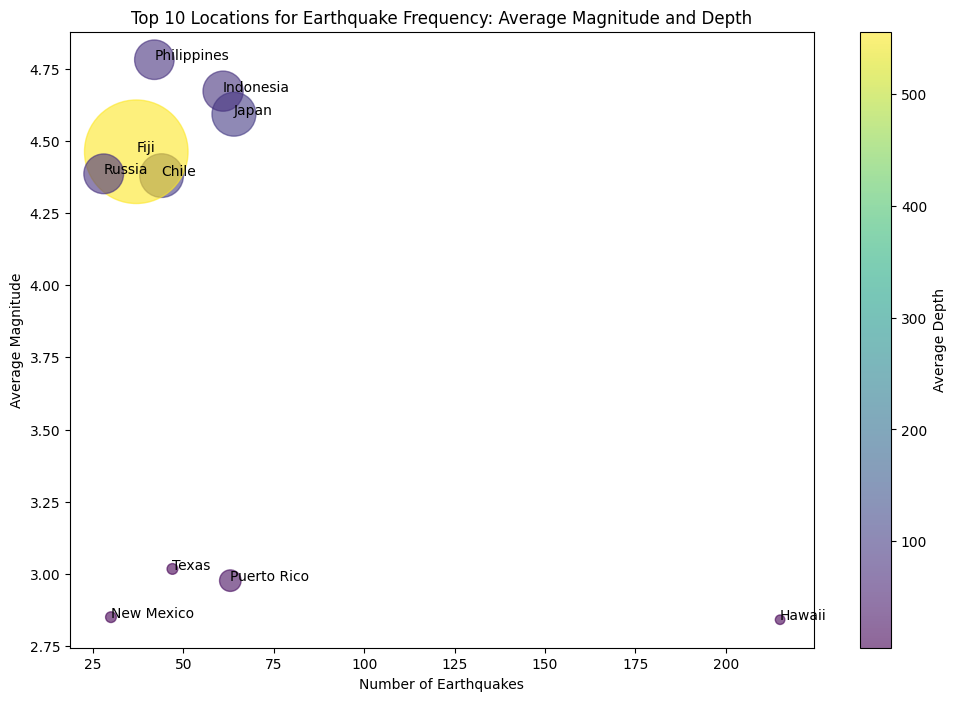

In [61]:
# Create scatter graph of the locations with the top 10 most earthquakes, demonstrating that averae magnitude and depth
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=top_locations['num_earthquakes'],
    y=top_locations['avg_magnitude'],
    s=top_locations['avg_depth'] * 10,
    alpha=0.6,
    c=top_locations['avg_depth'],
)

# Add labels and title
plt.xlabel('Number of Earthquakes')
plt.ylabel('Average Magnitude')
plt.title('Top 10 Locations for Earthquake Frequency: Average Magnitude and Depth')
plt.colorbar(scatter, label='Average Depth')

# Label each point with the country name
for i in top_locations.index:
    plt.text(
        x=top_locations.loc[i, 'num_earthquakes'],  # x-coordinate
        y=top_locations.loc[i, 'avg_magnitude'],    # y-coordinate
        s=top_locations.loc[i, 'final_country'],    # Location name
    )

plt.show()

In [82]:
# Function to normalise colums using min-max scaling
def min_max_normalise(series):
    return (series - series.min()) / (series.max() - series.min())

In [83]:
# Normalise the average magnitude and the average depth
top_locations['avg_magnitude_norm'] = min_max_normalise(top_locations['avg_magnitude'])
top_locations['avg_depth_norm'] = min_max_normalise(top_locations['avg_depth'])

# Define weights to prioritise magnitude,depth and numnber of earthquakes in risk score
weights = {
    'num_earthquakes': 0.1,  # Lower weight for the number of earthquakes
    'avg_magnitude': 0.5,    # Higher weight for average magnitude
    'avg_depth': 0.4         # Higher weight for average depth
}

# Calculate risk score using all factors
top_locations['risk_score'] = (
    weights['num_earthquakes'] * (top_locations['num_earthquakes'] - top_locations['num_earthquakes'].min()) / (top_locations['num_earthquakes'].max() - top_locations['num_earthquakes'].min()) +
    weights['avg_magnitude'] * top_locations['avg_magnitude_norm'] +
    weights['avg_depth'] * top_locations['avg_depth_norm']
)

# Sort locations by risk score from highest to lowest
top_locations_risk = top_locations.sort_values(by='risk_score', ascending=False)

# Print the top locations with the highest risk scores
print("Top locations with the highest risk scores (top 10):")
print(top_locations_risk[['final_country', 'risk_score']])

# Print the top 3 countries that are the highest risk
top_3_countries = top_locations_risk.head(3)
print("\nThe 3 countries that are the highest risk to insure are:")
for country in top_3_countries['final_country']:
    print(f"- {country}")


Top locations with the highest risk scores (top 10):
   final_country  risk_score
21          Fiji    0.822643
73   Philippines    0.562757
35     Indonesia    0.546826
40         Japan    0.539748
13         Chile    0.473458
80        Russia    0.454156
28        Hawaii    0.100000
77   Puerto Rico    0.067654
93         Texas    0.056455
60    New Mexico    0.004289

The 3 countries that are the highest risk to insure are:
- Fiji
- Philippines
- Indonesia
